# voglio un geodataframe
- con zona
- numero ori, argenti, bronzi
- numero partecipanti
- posizione media
- posizione mediana
- tasso ori, tasso argenti, tasso bronzi

In [41]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as ctx

In [42]:
regDb = gpd.read_file("data/Limiti01012024_g/Limiti01012024_g/Reg01012024_g/Reg01012024_g_WGS84.shp")
regDb

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
0,1,1,Piemonte,1.234644e+06,2.539164e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,"POLYGON ((390652.643 5091766.170, 390748.643 5..."
2,1,3,Lombardia,1.411360e+06,2.386287e+10,"MULTIPOLYGON (((485536.498 4985444.636, 485366..."
3,2,4,Trentino-Alto Adige,8.007317e+05,1.360596e+10,"POLYGON ((743273.909 5219762.939, 743387.812 5..."
4,2,5,Veneto,1.056504e+06,1.835149e+10,"POLYGON ((768135.209 5175357.497, 768136.788 5..."
5,2,6,Friuli-Venezia Giulia,6.593411e+05,7.936834e+09,"MULTIPOLYGON (((871036.678 5066768.855, 871032..."
6,1,7,Liguria,8.219165e+05,5.417714e+09,"MULTIPOLYGON (((568227.844 4874810.869, 568220..."
7,2,8,Emilia-Romagna,1.176992e+06,2.250182e+10,"MULTIPOLYGON (((618343.929 4893985.660, 618335..."
8,3,9,Toscana,1.304650e+06,2.298501e+10,"MULTIPOLYGON (((674479.640 4680664.861, 674610..."
9,3,10,Umbria,6.194046e+05,8.463969e+09,"MULTIPOLYGON (((776982.135 4832209.841, 776910..."


In [43]:
Cese = pd.read_pickle("data/da_usare/Cese_2003-2024_data.pickle")
Cese.head(3)

,anno,studente,posizione,regione,classe,es1,es2,es3,es4,es5,es6,tot,medaglia,anno_breve,pt123,pt456,zona,colore
0,2003,Tiozzo Giulio,1,Piemonte,5,7,7,7,6,7,7,41,ORO,03,21,20,Nord-Ovest,Gold
1,2003,Mantova Vincenzo,2,Lombardia,5,7,7,7,7,7,5,40,ORO,03,21,19,Nord-Ovest,Gold
2,2003,Barbieri Luca,3,Lombardia,3,7,7,7,4,4,7,36,ORO,03,21,15,Nord-Ovest,Gold


In [44]:
Cese[Cese["regione"]=="Friuli-Venezia Giulia"]

,anno,studente,posizione,regione,classe,es1,es2,es3,es4,es5,es6,tot,medaglia,anno_breve,pt123,pt456,zona,colore
5,2003,Matiacic Andrea,3,Friuli-Venezia Giulia,5,7,7,5,6,7,4,36,ORO,03,19,17,Nord-Est,Gold
17,2003,Tassinari Luca,16,Friuli-Venezia Giulia,5,7,2,3,6,4,5,27,ORO,03,12,15,Nord-Est,Gold
18,2003,Negro Gabriele,16,Friuli-Venezia Giulia,3,7,2,7,6,4,1,27,ORO,03,16,11,Nord-Est,Gold
30,2003,Pizzi Giovanni,28,Friuli-Venezia Giulia,5,5,7,1,7,1,4,25,ORO,03,13,12,Nord-Est,Gold
87,2003,Spada Simone,86,Friuli-Venezia Giulia,3,7,1,1,7,1,0,17,BRONZO,03,9,8,Nord-Est,#CD7F32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,2019,Roncoli Andrea,122,Friuli-Venezia Giulia,5,7,5,1,0,0,0,13,BRONZO,19,13,0,Nord-Est,#CD7F32
4990,2019,Mattiazzi Alessandro,175,Friuli-Venezia Giulia,2,7,0,1,0,0,1,9,MENZIONE,19,8,1,Nord-Est,#FC0FC0
5044,2019,Defend Enrico,235,Friuli-Venezia Giulia,3,0,2,1,0,1,0,4,-,19,3,1,Nord-Est,#7FFF00
5047,2019,Bertoli Michele,241,Friuli-Venezia Giulia,1,0,2,1,0,0,0,3,-,19,3,0,Nord-Est,#7FFF00


In [45]:
partecipanti = Cese.groupby("regione").size()
partecipanti = partecipanti.rename("partecipanti")
partecipanti

regione
-                        1767
Abruzzo                   122
Basilicata                 43
Calabria                  130
Campania                  310
Emilia-Romagna            382
Friuli-Venezia Giulia     193
Lazio                     419
Liguria                   150
Lombardia                 695
Marche                    119
Molise                     42
Piemonte                  414
Puglia                    293
Sardegna                  108
Sicilia                   330
Toscana                   397
Trentino-Alto Adige       121
Umbria                     67
Valle d'Aosta              16
Veneto                    466
Name: partecipanti, dtype: int64

In [46]:
ori = (Cese[Cese["medaglia"]=="ORO"]).groupby("regione").size()
ori = ori[ ori.index != "-" ]
ori = ori.rename("num_oro")
ori

regione
Abruzzo                  11
Basilicata                1
Calabria                  2
Campania                 19
Emilia-Romagna           22
Friuli-Venezia Giulia    27
Lazio                    50
Liguria                   9
Lombardia                81
Marche                    8
Molise                    1
Piemonte                 35
Puglia                   21
Sardegna                  3
Sicilia                  13
Toscana                  33
Trentino-Alto Adige       9
Veneto                   59
Name: num_oro, dtype: int64

In [47]:
df = regDb.merge(partecipanti, left_on="DEN_REG", right_index=True, how="left")
df

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,partecipanti
0,1,1,Piemonte,1.234644e+06,2.539164e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",414
1,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,"POLYGON ((390652.643 5091766.170, 390748.643 5...",16
2,1,3,Lombardia,1.411360e+06,2.386287e+10,"MULTIPOLYGON (((485536.498 4985444.636, 485366...",695
3,2,4,Trentino-Alto Adige,8.007317e+05,1.360596e+10,"POLYGON ((743273.909 5219762.939, 743387.812 5...",121
4,2,5,Veneto,1.056504e+06,1.835149e+10,"POLYGON ((768135.209 5175357.497, 768136.788 5...",466
5,2,6,Friuli-Venezia Giulia,6.593411e+05,7.936834e+09,"MULTIPOLYGON (((871036.678 5066768.855, 871032...",193
6,1,7,Liguria,8.219165e+05,5.417714e+09,"MULTIPOLYGON (((568227.844 4874810.869, 568220...",150
7,2,8,Emilia-Romagna,1.176992e+06,2.250182e+10,"MULTIPOLYGON (((618343.929 4893985.660, 618335...",382
8,3,9,Toscana,1.304650e+06,2.298501e+10,"MULTIPOLYGON (((674479.640 4680664.861, 674610...",397
9,3,10,Umbria,6.194046e+05,8.463969e+09,"MULTIPOLYGON (((776982.135 4832209.841, 776910...",67


In [48]:
df = df.merge(ori, left_on="DEN_REG", right_index=True, how="left")
df

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,partecipanti,num_oro
0,1,1,Piemonte,1.234644e+06,2.539164e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",414,35.0
1,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,"POLYGON ((390652.643 5091766.170, 390748.643 5...",16,NaN
2,1,3,Lombardia,1.411360e+06,2.386287e+10,"MULTIPOLYGON (((485536.498 4985444.636, 485366...",695,81.0
3,2,4,Trentino-Alto Adige,8.007317e+05,1.360596e+10,"POLYGON ((743273.909 5219762.939, 743387.812 5...",121,9.0
4,2,5,Veneto,1.056504e+06,1.835149e+10,"POLYGON ((768135.209 5175357.497, 768136.788 5...",466,59.0
5,2,6,Friuli-Venezia Giulia,6.593411e+05,7.936834e+09,"MULTIPOLYGON (((871036.678 5066768.855, 871032...",193,27.0
6,1,7,Liguria,8.219165e+05,5.417714e+09,"MULTIPOLYGON (((568227.844 4874810.869, 568220...",150,9.0
7,2,8,Emilia-Romagna,1.176992e+06,2.250182e+10,"MULTIPOLYGON (((618343.929 4893985.660, 618335...",382,22.0
8,3,9,Toscana,1.304650e+06,2.298501e+10,"MULTIPOLYGON (((674479.640 4680664.861, 674610...",397,33.0
9,3,10,Umbria,6.194046e+05,8.463969e+09,"MULTIPOLYGON (((776982.135 4832209.841, 776910...",67,NaN


In [49]:
argenti = (Cese[Cese["medaglia"]=="ARGENTO"]).groupby("regione").size()
argenti = argenti[ argenti.index != "-" ]
argenti = argenti.rename("num_argento")
df = df.merge(argenti, left_on="DEN_REG", right_index=True, how="left")
df

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,partecipanti,num_oro,num_argento
0,1,1,Piemonte,1.234644e+06,2.539164e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",414,35.0,82
1,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,"POLYGON ((390652.643 5091766.170, 390748.643 5...",16,NaN,3
2,1,3,Lombardia,1.411360e+06,2.386287e+10,"MULTIPOLYGON (((485536.498 4985444.636, 485366...",695,81.0,157
3,2,4,Trentino-Alto Adige,8.007317e+05,1.360596e+10,"POLYGON ((743273.909 5219762.939, 743387.812 5...",121,9.0,30
4,2,5,Veneto,1.056504e+06,1.835149e+10,"POLYGON ((768135.209 5175357.497, 768136.788 5...",466,59.0,95
5,2,6,Friuli-Venezia Giulia,6.593411e+05,7.936834e+09,"MULTIPOLYGON (((871036.678 5066768.855, 871032...",193,27.0,40
6,1,7,Liguria,8.219165e+05,5.417714e+09,"MULTIPOLYGON (((568227.844 4874810.869, 568220...",150,9.0,29
7,2,8,Emilia-Romagna,1.176992e+06,2.250182e+10,"MULTIPOLYGON (((618343.929 4893985.660, 618335...",382,22.0,73
8,3,9,Toscana,1.304650e+06,2.298501e+10,"MULTIPOLYGON (((674479.640 4680664.861, 674610...",397,33.0,73
9,3,10,Umbria,6.194046e+05,8.463969e+09,"MULTIPOLYGON (((776982.135 4832209.841, 776910...",67,NaN,11


In [50]:
bronzi = (Cese[Cese["medaglia"]=="BRONZO"]).groupby("regione").size()
bronzi = bronzi[ bronzi.index != "-" ]
bronzi = bronzi.rename("num_bronzo")
df = df.merge(bronzi, left_on="DEN_REG", right_index=True, how="left")
df

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,partecipanti,num_oro,num_argento,num_bronzo
0,1,1,Piemonte,1.234644e+06,2.539164e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",414,35.0,82,100.0
1,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,"POLYGON ((390652.643 5091766.170, 390748.643 5...",16,NaN,3,NaN
2,1,3,Lombardia,1.411360e+06,2.386287e+10,"MULTIPOLYGON (((485536.498 4985444.636, 485366...",695,81.0,157,183.0
3,2,4,Trentino-Alto Adige,8.007317e+05,1.360596e+10,"POLYGON ((743273.909 5219762.939, 743387.812 5...",121,9.0,30,22.0
4,2,5,Veneto,1.056504e+06,1.835149e+10,"POLYGON ((768135.209 5175357.497, 768136.788 5...",466,59.0,95,122.0
5,2,6,Friuli-Venezia Giulia,6.593411e+05,7.936834e+09,"MULTIPOLYGON (((871036.678 5066768.855, 871032...",193,27.0,40,57.0
6,1,7,Liguria,8.219165e+05,5.417714e+09,"MULTIPOLYGON (((568227.844 4874810.869, 568220...",150,9.0,29,40.0
7,2,8,Emilia-Romagna,1.176992e+06,2.250182e+10,"MULTIPOLYGON (((618343.929 4893985.660, 618335...",382,22.0,73,96.0
8,3,9,Toscana,1.304650e+06,2.298501e+10,"MULTIPOLYGON (((674479.640 4680664.861, 674610...",397,33.0,73,102.0
9,3,10,Umbria,6.194046e+05,8.463969e+09,"MULTIPOLYGON (((776982.135 4832209.841, 776910...",67,NaN,11,18.0


In [51]:
df = df.fillna(0)
df

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,partecipanti,num_oro,num_argento,num_bronzo
0,1,1,Piemonte,1.234644e+06,2.539164e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",414,35.0,82,100.0
1,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,"POLYGON ((390652.643 5091766.170, 390748.643 5...",16,0.0,3,0.0
2,1,3,Lombardia,1.411360e+06,2.386287e+10,"MULTIPOLYGON (((485536.498 4985444.636, 485366...",695,81.0,157,183.0
3,2,4,Trentino-Alto Adige,8.007317e+05,1.360596e+10,"POLYGON ((743273.909 5219762.939, 743387.812 5...",121,9.0,30,22.0
4,2,5,Veneto,1.056504e+06,1.835149e+10,"POLYGON ((768135.209 5175357.497, 768136.788 5...",466,59.0,95,122.0
5,2,6,Friuli-Venezia Giulia,6.593411e+05,7.936834e+09,"MULTIPOLYGON (((871036.678 5066768.855, 871032...",193,27.0,40,57.0
6,1,7,Liguria,8.219165e+05,5.417714e+09,"MULTIPOLYGON (((568227.844 4874810.869, 568220...",150,9.0,29,40.0
7,2,8,Emilia-Romagna,1.176992e+06,2.250182e+10,"MULTIPOLYGON (((618343.929 4893985.660, 618335...",382,22.0,73,96.0
8,3,9,Toscana,1.304650e+06,2.298501e+10,"MULTIPOLYGON (((674479.640 4680664.861, 674610...",397,33.0,73,102.0
9,3,10,Umbria,6.194046e+05,8.463969e+09,"MULTIPOLYGON (((776982.135 4832209.841, 776910...",67,0.0,11,18.0


In [52]:
df = df.astype({"partecipanti": int, "num_oro": int, "num_argento": int, "num_bronzo": int})
df.dtypes

COD_RIP            int64
COD_REG            int64
DEN_REG           object
Shape_Leng       float64
Shape_Area       float64
geometry        geometry
partecipanti       int32
num_oro            int32
num_argento        int32
num_bronzo         int32
dtype: object

In [53]:
df["tasso_oro"] = df["num_oro"] / df["partecipanti"]
df

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,partecipanti,num_oro,num_argento,num_bronzo,tasso_oro
0,1,1,Piemonte,1.234644e+06,2.539164e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",414,35,82,100,0.084541
1,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,"POLYGON ((390652.643 5091766.170, 390748.643 5...",16,0,3,0,0.000000
2,1,3,Lombardia,1.411360e+06,2.386287e+10,"MULTIPOLYGON (((485536.498 4985444.636, 485366...",695,81,157,183,0.116547
3,2,4,Trentino-Alto Adige,8.007317e+05,1.360596e+10,"POLYGON ((743273.909 5219762.939, 743387.812 5...",121,9,30,22,0.074380
4,2,5,Veneto,1.056504e+06,1.835149e+10,"POLYGON ((768135.209 5175357.497, 768136.788 5...",466,59,95,122,0.126609
5,2,6,Friuli-Venezia Giulia,6.593411e+05,7.936834e+09,"MULTIPOLYGON (((871036.678 5066768.855, 871032...",193,27,40,57,0.139896
6,1,7,Liguria,8.219165e+05,5.417714e+09,"MULTIPOLYGON (((568227.844 4874810.869, 568220...",150,9,29,40,0.060000
7,2,8,Emilia-Romagna,1.176992e+06,2.250182e+10,"MULTIPOLYGON (((618343.929 4893985.660, 618335...",382,22,73,96,0.057592
8,3,9,Toscana,1.304650e+06,2.298501e+10,"MULTIPOLYGON (((674479.640 4680664.861, 674610...",397,33,73,102,0.083123
9,3,10,Umbria,6.194046e+05,8.463969e+09,"MULTIPOLYGON (((776982.135 4832209.841, 776910...",67,0,11,18,0.000000


In [54]:
df["tasso_argento"] = df["num_argento"] / df["partecipanti"]
df["tasso_bronzo"] = df["num_bronzo"] / df["partecipanti"]
df

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,partecipanti,num_oro,num_argento,num_bronzo,tasso_oro,tasso_argento,tasso_bronzo
0,1,1,Piemonte,1.234644e+06,2.539164e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",414,35,82,100,0.084541,0.198068,0.241546
1,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,"POLYGON ((390652.643 5091766.170, 390748.643 5...",16,0,3,0,0.000000,0.187500,0.000000
2,1,3,Lombardia,1.411360e+06,2.386287e+10,"MULTIPOLYGON (((485536.498 4985444.636, 485366...",695,81,157,183,0.116547,0.225899,0.263309
3,2,4,Trentino-Alto Adige,8.007317e+05,1.360596e+10,"POLYGON ((743273.909 5219762.939, 743387.812 5...",121,9,30,22,0.074380,0.247934,0.181818
4,2,5,Veneto,1.056504e+06,1.835149e+10,"POLYGON ((768135.209 5175357.497, 768136.788 5...",466,59,95,122,0.126609,0.203863,0.261803
5,2,6,Friuli-Venezia Giulia,6.593411e+05,7.936834e+09,"MULTIPOLYGON (((871036.678 5066768.855, 871032...",193,27,40,57,0.139896,0.207254,0.295337
6,1,7,Liguria,8.219165e+05,5.417714e+09,"MULTIPOLYGON (((568227.844 4874810.869, 568220...",150,9,29,40,0.060000,0.193333,0.266667
7,2,8,Emilia-Romagna,1.176992e+06,2.250182e+10,"MULTIPOLYGON (((618343.929 4893985.660, 618335...",382,22,73,96,0.057592,0.191099,0.251309
8,3,9,Toscana,1.304650e+06,2.298501e+10,"MULTIPOLYGON (((674479.640 4680664.861, 674610...",397,33,73,102,0.083123,0.183879,0.256927
9,3,10,Umbria,6.194046e+05,8.463969e+09,"MULTIPOLYGON (((776982.135 4832209.841, 776910...",67,0,11,18,0.000000,0.164179,0.268657


In [55]:
men = (Cese[Cese["medaglia"]=="MENZIONE"]).groupby("regione").size()
men = men[ men.index != "-" ]
men = men.rename("num_menzione")
df = df.merge(men, left_on="DEN_REG", right_index=True, how="left")
df

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,partecipanti,num_oro,num_argento,num_bronzo,tasso_oro,tasso_argento,tasso_bronzo,num_menzione
0,1,1,Piemonte,1.234644e+06,2.539164e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",414,35,82,100,0.084541,0.198068,0.241546,81
1,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,"POLYGON ((390652.643 5091766.170, 390748.643 5...",16,0,3,0,0.000000,0.187500,0.000000,5
2,1,3,Lombardia,1.411360e+06,2.386287e+10,"MULTIPOLYGON (((485536.498 4985444.636, 485366...",695,81,157,183,0.116547,0.225899,0.263309,104
3,2,4,Trentino-Alto Adige,8.007317e+05,1.360596e+10,"POLYGON ((743273.909 5219762.939, 743387.812 5...",121,9,30,22,0.074380,0.247934,0.181818,25
4,2,5,Veneto,1.056504e+06,1.835149e+10,"POLYGON ((768135.209 5175357.497, 768136.788 5...",466,59,95,122,0.126609,0.203863,0.261803,87
5,2,6,Friuli-Venezia Giulia,6.593411e+05,7.936834e+09,"MULTIPOLYGON (((871036.678 5066768.855, 871032...",193,27,40,57,0.139896,0.207254,0.295337,28
6,1,7,Liguria,8.219165e+05,5.417714e+09,"MULTIPOLYGON (((568227.844 4874810.869, 568220...",150,9,29,40,0.060000,0.193333,0.266667,28
7,2,8,Emilia-Romagna,1.176992e+06,2.250182e+10,"MULTIPOLYGON (((618343.929 4893985.660, 618335...",382,22,73,96,0.057592,0.191099,0.251309,94
8,3,9,Toscana,1.304650e+06,2.298501e+10,"MULTIPOLYGON (((674479.640 4680664.861, 674610...",397,33,73,102,0.083123,0.183879,0.256927,75
9,3,10,Umbria,6.194046e+05,8.463969e+09,"MULTIPOLYGON (((776982.135 4832209.841, 776910...",67,0,11,18,0.000000,0.164179,0.268657,19


In [56]:
df = df.fillna(0)

In [57]:
df["tasso_menzione"] = df["num_menzione"] / df["partecipanti"]
df

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,partecipanti,num_oro,num_argento,num_bronzo,tasso_oro,tasso_argento,tasso_bronzo,num_menzione,tasso_menzione
0,1,1,Piemonte,1.234644e+06,2.539164e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",414,35,82,100,0.084541,0.198068,0.241546,81,0.195652
1,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,"POLYGON ((390652.643 5091766.170, 390748.643 5...",16,0,3,0,0.000000,0.187500,0.000000,5,0.312500
2,1,3,Lombardia,1.411360e+06,2.386287e+10,"MULTIPOLYGON (((485536.498 4985444.636, 485366...",695,81,157,183,0.116547,0.225899,0.263309,104,0.149640
3,2,4,Trentino-Alto Adige,8.007317e+05,1.360596e+10,"POLYGON ((743273.909 5219762.939, 743387.812 5...",121,9,30,22,0.074380,0.247934,0.181818,25,0.206612
4,2,5,Veneto,1.056504e+06,1.835149e+10,"POLYGON ((768135.209 5175357.497, 768136.788 5...",466,59,95,122,0.126609,0.203863,0.261803,87,0.186695
5,2,6,Friuli-Venezia Giulia,6.593411e+05,7.936834e+09,"MULTIPOLYGON (((871036.678 5066768.855, 871032...",193,27,40,57,0.139896,0.207254,0.295337,28,0.145078
6,1,7,Liguria,8.219165e+05,5.417714e+09,"MULTIPOLYGON (((568227.844 4874810.869, 568220...",150,9,29,40,0.060000,0.193333,0.266667,28,0.186667
7,2,8,Emilia-Romagna,1.176992e+06,2.250182e+10,"MULTIPOLYGON (((618343.929 4893985.660, 618335...",382,22,73,96,0.057592,0.191099,0.251309,94,0.246073
8,3,9,Toscana,1.304650e+06,2.298501e+10,"MULTIPOLYGON (((674479.640 4680664.861, 674610...",397,33,73,102,0.083123,0.183879,0.256927,75,0.188917
9,3,10,Umbria,6.194046e+05,8.463969e+09,"MULTIPOLYGON (((776982.135 4832209.841, 776910...",67,0,11,18,0.000000,0.164179,0.268657,19,0.283582


In [58]:
df["num_medaglie"] = df["num_oro"] + df["num_argento"] + df["num_bronzo"]
df["tasso_medaglie"] = df["num_medaglie"] / df["partecipanti"]
df.head(3)

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,partecipanti,num_oro,num_argento,num_bronzo,tasso_oro,tasso_argento,tasso_bronzo,num_menzione,tasso_menzione,num_medaglie,tasso_medaglie
0,1,1,Piemonte,1.234644e+06,2.539164e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",414,35,82,100,0.084541,0.198068,0.241546,81,0.195652,217,0.524155
1,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,"POLYGON ((390652.643 5091766.170, 390748.643 5...",16,0,3,0,0.000000,0.187500,0.000000,5,0.312500,3,0.187500
2,1,3,Lombardia,1.411360e+06,2.386287e+10,"MULTIPOLYGON (((485536.498 4985444.636, 485366...",695,81,157,183,0.116547,0.225899,0.263309,104,0.149640,421,0.605755


In [59]:
cols = df.columns.tolist()
cols

['COD_RIP',
 'COD_REG',
 'DEN_REG',
 'Shape_Leng',
 'Shape_Area',
 'geometry',
 'partecipanti',
 'num_oro',
 'num_argento',
 'num_bronzo',
 'tasso_oro',
 'tasso_argento',
 'tasso_bronzo',
 'num_menzione',
 'tasso_menzione',
 'num_medaglie',
 'tasso_medaglie']

In [60]:
ordered_cols = ["COD_RIP", "COD_REG", "DEN_REG", "Shape_Leng", "Shape_Area", "geometry",
               "partecipanti", "num_menzione", "num_bronzo", "num_argento", "num_oro", "num_medaglie",
               "tasso_menzione", "tasso_bronzo", "tasso_argento", "tasso_oro", "tasso_medaglie"]

In [61]:
df = df[ordered_cols]
df

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,partecipanti,num_menzione,num_bronzo,num_argento,num_oro,num_medaglie,tasso_menzione,tasso_bronzo,tasso_argento,tasso_oro,tasso_medaglie
0,1,1,Piemonte,1.234644e+06,2.539164e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",414,81,100,82,35,217,0.195652,0.241546,0.198068,0.084541,0.524155
1,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,"POLYGON ((390652.643 5091766.170, 390748.643 5...",16,5,0,3,0,3,0.312500,0.000000,0.187500,0.000000,0.187500
2,1,3,Lombardia,1.411360e+06,2.386287e+10,"MULTIPOLYGON (((485536.498 4985444.636, 485366...",695,104,183,157,81,421,0.149640,0.263309,0.225899,0.116547,0.605755
3,2,4,Trentino-Alto Adige,8.007317e+05,1.360596e+10,"POLYGON ((743273.909 5219762.939, 743387.812 5...",121,25,22,30,9,61,0.206612,0.181818,0.247934,0.074380,0.504132
4,2,5,Veneto,1.056504e+06,1.835149e+10,"POLYGON ((768135.209 5175357.497, 768136.788 5...",466,87,122,95,59,276,0.186695,0.261803,0.203863,0.126609,0.592275
5,2,6,Friuli-Venezia Giulia,6.593411e+05,7.936834e+09,"MULTIPOLYGON (((871036.678 5066768.855, 871032...",193,28,57,40,27,124,0.145078,0.295337,0.207254,0.139896,0.642487
6,1,7,Liguria,8.219165e+05,5.417714e+09,"MULTIPOLYGON (((568227.844 4874810.869, 568220...",150,28,40,29,9,78,0.186667,0.266667,0.193333,0.060000,0.520000
7,2,8,Emilia-Romagna,1.176992e+06,2.250182e+10,"MULTIPOLYGON (((618343.929 4893985.660, 618335...",382,94,96,73,22,191,0.246073,0.251309,0.191099,0.057592,0.500000
8,3,9,Toscana,1.304650e+06,2.298501e+10,"MULTIPOLYGON (((674479.640 4680664.861, 674610...",397,75,102,73,33,208,0.188917,0.256927,0.183879,0.083123,0.523929
9,3,10,Umbria,6.194046e+05,8.463969e+09,"MULTIPOLYGON (((776982.135 4832209.841, 776910...",67,19,18,11,0,29,0.283582,0.268657,0.164179,0.000000,0.432836


In [62]:
df.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [63]:
#df.to_file("data/regioni_prova/regioni.shp")

C:\Users\micbe\AppData\Local\Temp\ipykernel_17380\1662165394.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file("data/regioni_prova/regioni.shp")


In [65]:
df = df.rename(columns={"partecipanti": "persone",
                   "num_menzione": "n_menzione", "num_bronzo": "n_bronzo", "num_argento": "n_argento", "num_oro": "n_oro", "num_medaglie": "n_medaglie",
                   "tasso_menzione": "r_menzione", "tasso_bronzo": "r_bronzo", "tasso_argento": "r_argento", "tasso_oro": "r_oro",
                   "tasso_medaglie": "r_medaglie"})
df

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,persone,n_menzione,n_bronzo,n_argento,n_oro,n_medaglie,r_menzione,r_bronzo,r_argento,r_oro,r_medaglie
0,1,1,Piemonte,1.234644e+06,2.539164e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",414,81,100,82,35,217,0.195652,0.241546,0.198068,0.084541,0.524155
1,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,"POLYGON ((390652.643 5091766.170, 390748.643 5...",16,5,0,3,0,3,0.312500,0.000000,0.187500,0.000000,0.187500
2,1,3,Lombardia,1.411360e+06,2.386287e+10,"MULTIPOLYGON (((485536.498 4985444.636, 485366...",695,104,183,157,81,421,0.149640,0.263309,0.225899,0.116547,0.605755
3,2,4,Trentino-Alto Adige,8.007317e+05,1.360596e+10,"POLYGON ((743273.909 5219762.939, 743387.812 5...",121,25,22,30,9,61,0.206612,0.181818,0.247934,0.074380,0.504132
4,2,5,Veneto,1.056504e+06,1.835149e+10,"POLYGON ((768135.209 5175357.497, 768136.788 5...",466,87,122,95,59,276,0.186695,0.261803,0.203863,0.126609,0.592275
5,2,6,Friuli-Venezia Giulia,6.593411e+05,7.936834e+09,"MULTIPOLYGON (((871036.678 5066768.855, 871032...",193,28,57,40,27,124,0.145078,0.295337,0.207254,0.139896,0.642487
6,1,7,Liguria,8.219165e+05,5.417714e+09,"MULTIPOLYGON (((568227.844 4874810.869, 568220...",150,28,40,29,9,78,0.186667,0.266667,0.193333,0.060000,0.520000
7,2,8,Emilia-Romagna,1.176992e+06,2.250182e+10,"MULTIPOLYGON (((618343.929 4893985.660, 618335...",382,94,96,73,22,191,0.246073,0.251309,0.191099,0.057592,0.500000
8,3,9,Toscana,1.304650e+06,2.298501e+10,"MULTIPOLYGON (((674479.640 4680664.861, 674610...",397,75,102,73,33,208,0.188917,0.256927,0.183879,0.083123,0.523929
9,3,10,Umbria,6.194046e+05,8.463969e+09,"MULTIPOLYGON (((776982.135 4832209.841, 776910...",67,19,18,11,0,29,0.283582,0.268657,0.164179,0.000000,0.432836


In [69]:
Cese.head(2)

,anno,studente,posizione,regione,classe,es1,es2,es3,es4,es5,es6,tot,medaglia,anno_breve,pt123,pt456,zona,colore
0,2003,Tiozzo Giulio,1,Piemonte,5,7,7,7,6,7,7,41,ORO,03,21,20,Nord-Ovest,Gold
1,2003,Mantova Vincenzo,2,Lombardia,5,7,7,7,7,7,5,40,ORO,03,21,19,Nord-Ovest,Gold


In [70]:
Cese[["posizione", "regione"]].head(2)

,posizione,regione
0,1,Piemonte
1,2,Lombardia


In [72]:
pos_media = Cese[["posizione", "regione"]].groupby("regione").mean()
pos_media

,posizione
regione,
-,142.614035
Abruzzo,162.926230
Basilicata,201.813953
Calabria,213.623077
Campania,170.483871
Emilia-Romagna,139.455497
Friuli-Venezia Giulia,116.746114
Lazio,137.935561
Liguria,142.046667


In [73]:
pos_mediana = Cese[["posizione", "regione"]].groupby("regione").median()
pos_mediana

,posizione
regione,
-,138.0
Abruzzo,171.5
Basilicata,218.0
Calabria,230.0
Campania,177.0
Emilia-Romagna,134.0
Friuli-Venezia Giulia,105.0
Lazio,135.0
Liguria,133.5


In [76]:
pos_media = pos_media.rename(columns={"posizione": "pos_media"})
df = df.merge(pos_media, left_on="DEN_REG", right_index=True, how="left")
df

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,persone,n_menzione,n_bronzo,n_argento,n_oro,n_medaglie,r_menzione,r_bronzo,r_argento,r_oro,r_medaglie,pos_media
0,1,1,Piemonte,1.234644e+06,2.539164e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",414,81,100,82,35,217,0.195652,0.241546,0.198068,0.084541,0.524155,138.094203
1,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,"POLYGON ((390652.643 5091766.170, 390748.643 5...",16,5,0,3,0,3,0.312500,0.000000,0.187500,0.000000,0.187500,176.812500
2,1,3,Lombardia,1.411360e+06,2.386287e+10,"MULTIPOLYGON (((485536.498 4985444.636, 485366...",695,104,183,157,81,421,0.149640,0.263309,0.225899,0.116547,0.605755,122.941007
3,2,4,Trentino-Alto Adige,8.007317e+05,1.360596e+10,"POLYGON ((743273.909 5219762.939, 743387.812 5...",121,25,22,30,9,61,0.206612,0.181818,0.247934,0.074380,0.504132,138.355372
4,2,5,Veneto,1.056504e+06,1.835149e+10,"POLYGON ((768135.209 5175357.497, 768136.788 5...",466,87,122,95,59,276,0.186695,0.261803,0.203863,0.126609,0.592275,120.611588
5,2,6,Friuli-Venezia Giulia,6.593411e+05,7.936834e+09,"MULTIPOLYGON (((871036.678 5066768.855, 871032...",193,28,57,40,27,124,0.145078,0.295337,0.207254,0.139896,0.642487,116.746114
6,1,7,Liguria,8.219165e+05,5.417714e+09,"MULTIPOLYGON (((568227.844 4874810.869, 568220...",150,28,40,29,9,78,0.186667,0.266667,0.193333,0.060000,0.520000,142.046667
7,2,8,Emilia-Romagna,1.176992e+06,2.250182e+10,"MULTIPOLYGON (((618343.929 4893985.660, 618335...",382,94,96,73,22,191,0.246073,0.251309,0.191099,0.057592,0.500000,139.455497
8,3,9,Toscana,1.304650e+06,2.298501e+10,"MULTIPOLYGON (((674479.640 4680664.861, 674610...",397,75,102,73,33,208,0.188917,0.256927,0.183879,0.083123,0.523929,138.886650
9,3,10,Umbria,6.194046e+05,8.463969e+09,"MULTIPOLYGON (((776982.135 4832209.841, 776910...",67,19,18,11,0,29,0.283582,0.268657,0.164179,0.000000,0.432836,147.985075


In [77]:
pos_mediana = pos_mediana.rename(columns={"posizione": "pos_median"})
df = df.merge(pos_mediana, left_on="DEN_REG", right_index=True, how="left")
df

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,persone,n_menzione,n_bronzo,n_argento,n_oro,n_medaglie,r_menzione,r_bronzo,r_argento,r_oro,r_medaglie,pos_media,pos_median
0,1,1,Piemonte,1.234644e+06,2.539164e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",414,81,100,82,35,217,0.195652,0.241546,0.198068,0.084541,0.524155,138.094203,131.0
1,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,"POLYGON ((390652.643 5091766.170, 390748.643 5...",16,5,0,3,0,3,0.312500,0.000000,0.187500,0.000000,0.187500,176.812500,168.0
2,1,3,Lombardia,1.411360e+06,2.386287e+10,"MULTIPOLYGON (((485536.498 4985444.636, 485366...",695,104,183,157,81,421,0.149640,0.263309,0.225899,0.116547,0.605755,122.941007,110.0
3,2,4,Trentino-Alto Adige,8.007317e+05,1.360596e+10,"POLYGON ((743273.909 5219762.939, 743387.812 5...",121,25,22,30,9,61,0.206612,0.181818,0.247934,0.074380,0.504132,138.355372,133.0
4,2,5,Veneto,1.056504e+06,1.835149e+10,"POLYGON ((768135.209 5175357.497, 768136.788 5...",466,87,122,95,59,276,0.186695,0.261803,0.203863,0.126609,0.592275,120.611588,113.0
5,2,6,Friuli-Venezia Giulia,6.593411e+05,7.936834e+09,"MULTIPOLYGON (((871036.678 5066768.855, 871032...",193,28,57,40,27,124,0.145078,0.295337,0.207254,0.139896,0.642487,116.746114,105.0
6,1,7,Liguria,8.219165e+05,5.417714e+09,"MULTIPOLYGON (((568227.844 4874810.869, 568220...",150,28,40,29,9,78,0.186667,0.266667,0.193333,0.060000,0.520000,142.046667,133.5
7,2,8,Emilia-Romagna,1.176992e+06,2.250182e+10,"MULTIPOLYGON (((618343.929 4893985.660, 618335...",382,94,96,73,22,191,0.246073,0.251309,0.191099,0.057592,0.500000,139.455497,134.0
8,3,9,Toscana,1.304650e+06,2.298501e+10,"MULTIPOLYGON (((674479.640 4680664.861, 674610...",397,75,102,73,33,208,0.188917,0.256927,0.183879,0.083123,0.523929,138.886650,133.0
9,3,10,Umbria,6.194046e+05,8.463969e+09,"MULTIPOLYGON (((776982.135 4832209.841, 776910...",67,19,18,11,0,29,0.283582,0.268657,0.164179,0.000000,0.432836,147.985075,149.0


In [78]:
df.head(3)

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,persone,n_menzione,n_bronzo,n_argento,n_oro,n_medaglie,r_menzione,r_bronzo,r_argento,r_oro,r_medaglie,pos_media,pos_median
0,1,1,Piemonte,1.234644e+06,2.539164e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",414,81,100,82,35,217,0.195652,0.241546,0.198068,0.084541,0.524155,138.094203,131.0
1,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,"POLYGON ((390652.643 5091766.170, 390748.643 5...",16,5,0,3,0,3,0.312500,0.000000,0.187500,0.000000,0.187500,176.812500,168.0
2,1,3,Lombardia,1.411360e+06,2.386287e+10,"MULTIPOLYGON (((485536.498 4985444.636, 485366...",695,104,183,157,81,421,0.149640,0.263309,0.225899,0.116547,0.605755,122.941007,110.0


In [79]:
df.to_file("data/regioni_db/regioni.shp")

<Axes: >

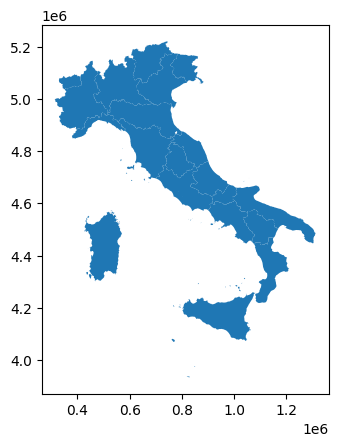

In [80]:
df.plot()